In [183]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [184]:
data_path = 'data'

# data = pd.read_csv(os.path.join(data_path, 'political-polarization-data.csv'),)
dateparse = lambda x: pd.to_datetime(x.split('-')[0], infer_datetime_format=True)
data = pd.read_csv(os.path.join(data_path, 'political-polarization-data.csv'), parse_dates=['date'], date_parser=dateparse)

data.set_index(pd.to_datetime(data['date']), drop=True, inplace=True)
data.drop(columns=['date'], inplace=True)
data = data[['Republicans', 'Independents', 'Democrats']]
data.head()

,Republicans,Independents,Democrats
date,,,
2020-03-13,92,43,13
2020-03-02,91,35,7
2020-02-17,92,42,8
2020-02-03,93,43,6
2020-01-16,94,42,7


In [185]:
data['month'] = data.index.month
data['year'] = data.index.year
data.head()

,Republicans,Independents,Democrats,month,year
date,,,,,
2020-03-13,92,43,13,3,2020
2020-03-02,91,35,7,3,2020
2020-02-17,92,42,8,2,2020
2020-02-03,93,43,6,2,2020
2020-01-16,94,42,7,1,2020


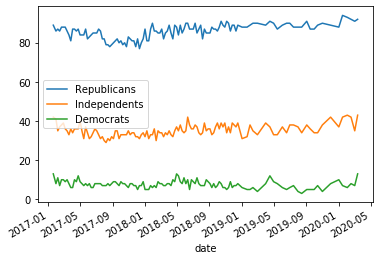

In [189]:
data[['Republicans', 'Independents', 'Democrats']].plot()

In [190]:
data = data.groupby(['month', 'year']).mean()

In [191]:
def col_to_date(row):
    year = row["year"]
    month = row["month"]
    date_str = f"{int(year):4d}-{int(month):02d}"
    return pd.to_datetime(date_str)
    
data.index = data.reset_index().apply(col_to_date, axis=1)
data.sort_index(inplace=True)
data.head()

,Republicans,Independents,Democrats
2017-01-01,87.50,41.50,10.50
2017-02-01,87.25,37.25,9.50
2017-03-01,84.75,35.00,8.25
2017-04-01,86.75,35.50,9.25
2017-05-01,84.20,35.40,7.80


In [192]:
data['Polarization'] = (data['Republicans'] -data['Democrats']).abs()

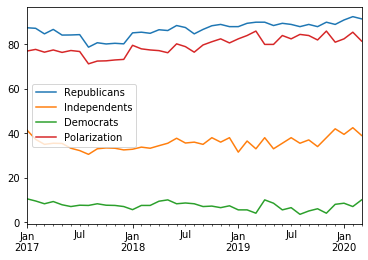

In [193]:
data.plot()
plt.show()

In [196]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(data['Republicans'])
# plt.show()
# plot_pacf(data['Republicans'])
# plt.show()

# plot_acf(data['Independents'])
# plt.show()
# plot_pacf(data['Independents'])
# plt.show()

# plot_acf(data['Democrats'])
# plt.show()
# plot_pacf(data['Democrats'])
# plt.show()

In [197]:
data2 = pd.read_excel('templates/political-polarization-forecast.xlsx')
data2.set_index('Time', inplace=True)

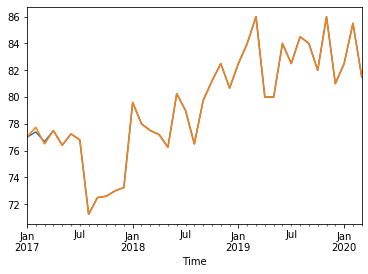

In [198]:
data2['Polarization'].plot()
data['Polarization'].plot()

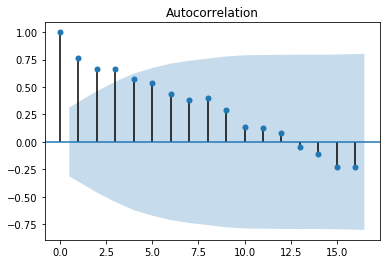

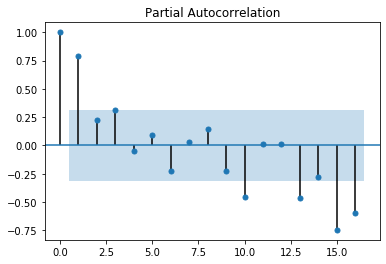

In [199]:
plot_acf(data2['Polarization'])
plt.show()
plot_pacf(data2['Polarization'])
plt.show()

'Polarization'

In [207]:
year = ['2020'] * 8 + ['2021'] * 4
dom = ['20'] * 8 +  ['21'] * 4
index = []
for i in range(5,17):
    if i%12 == 0:
        month = 12
    else:
        month = i%12
    index.append(pd.to_datetime(f"{year[i-5]}-{month:02d}-{dom[i-5]}"))
    
index
test = pd.DataFrame(data=np.zeros(len(index)), columns=['Polarization'])
test.index = pd.Series(index, name='Time')
test

[Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-06-20 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-08-20 00:00:00'),
 Timestamp('2020-09-20 00:00:00'),
 Timestamp('2020-10-20 00:00:00'),
 Timestamp('2020-11-20 00:00:00'),
 Timestamp('2020-12-20 00:00:00'),
 Timestamp('2021-01-21 00:00:00'),
 Timestamp('2021-02-21 00:00:00'),
 Timestamp('2021-03-21 00:00:00'),
 Timestamp('2021-04-21 00:00:00')]

In [216]:
naive_pred = pd.DataFrame(np.repeat(data2['Polarization'].mean(), len(test)), columns=test.columns, index=test.index)
naive_pred

,Polarization
Time,
2020-05-20,79.38547
2020-06-20,79.38547
2020-07-20,79.38547
2020-08-20,79.38547
2020-09-20,79.38547
2020-10-20,79.38547
2020-11-20,79.38547
2020-12-20,79.38547
2021-01-21,79.38547


In [217]:
y_hat = test.copy()

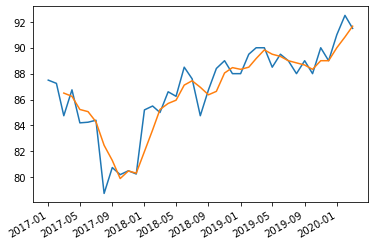

In [218]:
# window_size=3
# ax = plt.subplot(111)
# plt.plot(data['Republicans'], label='Train')
# data['Republicans'].rolling(window_size).mean().plot(ax=ax)
# plt.show()
# y_hat['naive_moving_average_reps'] = np.repeat(data['Republicans'].rolling(window_size).mean().iloc[-1], len(y_hat))

In [220]:
# window_size=3
# ax = plt.subplot(111)
# plt.plot(data['Independents'], label='Train')
# data['Independents'].rolling(window_size).mean().plot(ax=ax)
# plt.show()
# y_hat['naive_moving_average_inds'] = np.repeat(data['Independents'].rolling(window_size).mean().iloc[-1], len(y_hat))

In [221]:
# window_size=3
# ax = plt.subplot(111)
# plt.plot(data['Democrats'], label='Train')
# data['Democrats'].rolling(window_size).mean().plot(ax=ax)
# plt.show()
# y_hat['naive_moving_average_dems'] = np.repeat(data['Democrats'].rolling(window_size).mean().iloc[-1], len(y_hat))

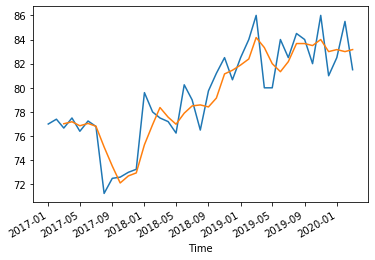

In [224]:
window_size=3
ax = plt.subplot(111)
plt.plot(data2['Polarization'], label='Train')
data2['Polarization'].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average_pol'] = np.repeat(data2['Polarization'].rolling(window_size).mean().iloc[-1], len(y_hat))

In [225]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit_es = ExponentialSmoothing(np.asarray(data['Republicans']) ,seasonal_periods=12,trend='add', seasonal='add',).fit()
# y_hat['Holt_Winter_Reps'] = fit_es.forecast(len(test))

# plt.figure(figsize=(16,8))
# plt.plot(data['Republicans'], label='Train')
# plt.plot(naive_pred['Republicans'], label='Average')
# plt.plot(y_hat['Holt_Winter_Reps'], label='Holt_Winter')
# plt.plot(y_hat['naive_moving_average_reps'], label='naive moving average')
# plt.legend(loc='best')
# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


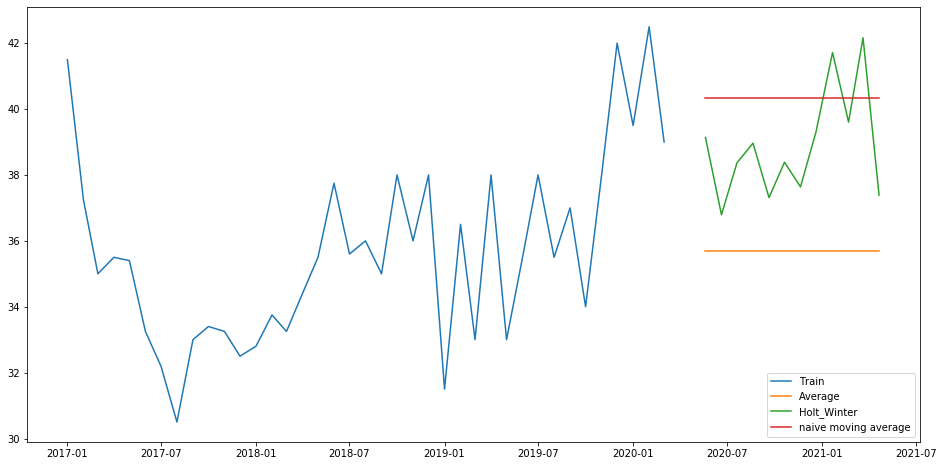

In [137]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit_es = ExponentialSmoothing(np.asarray(data['Independents']) ,seasonal_periods=12,trend='add', seasonal='add',).fit()
# y_hat['Holt_Winter_Inds'] = fit_es.forecast(len(test))

# plt.figure(figsize=(16,8))
# plt.plot(data['Independents'], label='Train')
# plt.plot(naive_pred['Independents'], label='Average')
# plt.plot(y_hat['Holt_Winter_Inds'], label='Holt_Winter')
# plt.plot(y_hat['naive_moving_average_inds'], label='naive moving average')
# plt.legend(loc='best')
# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


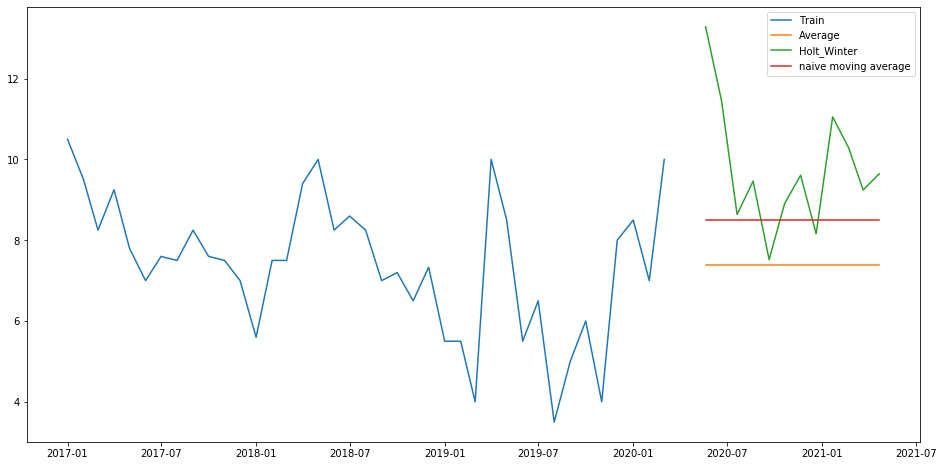

In [135]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit_es = ExponentialSmoothing(np.asarray(data['Democrats']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
# y_hat['Holt_Winter_Dems'] = fit_es.forecast(len(test))

# plt.figure(figsize=(16,8))
# plt.plot(data['Democrats'], label='Train')
# plt.plot(naive_pred['Democrats'], label='Average')
# plt.plot(y_hat['Holt_Winter_Dems'], label='Holt_Winter')
# plt.plot(y_hat['naive_moving_average_dems'], label='naive moving average')
# plt.legend(loc='best')
# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


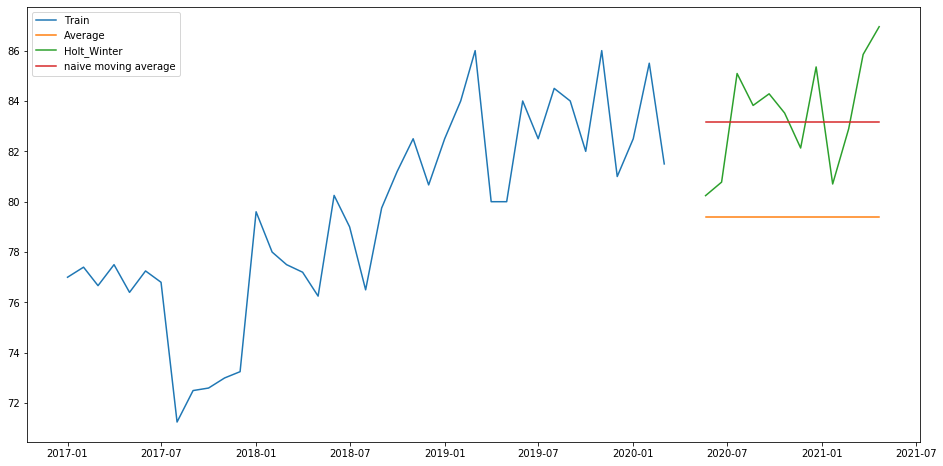

In [230]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data2['Polarization']) ,seasonal_periods=12 ,trend='add', seasonal='multiplicative',).fit()
y_hat['Holt_Winter_Pol'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data2['Polarization'], label='Train')
plt.plot(naive_pred['Polarization'], label='Average')
plt.plot(y_hat['Holt_Winter_Pol'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average_pol'], label='naive moving average')
plt.legend(loc='best')
plt.show()

In [232]:
# plt.plot(data[['Republicans', 'Independents', 'Democrats']], label='Train')
# plt.plot(y_hat['Holt_Winter_Reps'], label='Holt_Winter')
# plt.plot(y_hat['Holt_Winter_Inds'], label='Holt_Winter')
# plt.plot(y_hat['Holt_Winter_Dems'], label='Holt_Winter')
# plt.show()

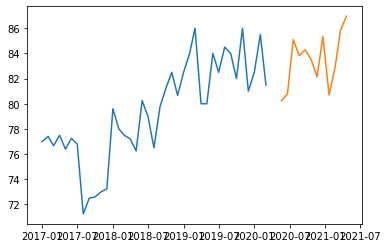

In [231]:
plt.plot(data2['Polarization'], label='Polarization')
plt.plot(y_hat['Holt_Winter_Pol'], label='Holt_Winter')
plt.show()

In [233]:
sub_path = 'submission'
# y_hat[['Holt_Winter_Reps', 'Holt_Winter_Inds', 'Holt_Winter_Dems']].to_csv(os.path.join(sub_path, 'stage1_political_polarization.csv'))
y_hat[['Holt_Winter_Pol']].to_csv(os.path.join(sub_path, 'stage1_political_polarization.csv'))